In [1]:
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt
import matplotlib as mpl
from shapely.geometry import Point
import plotly_express as px
import matplotlib.image as mpimg
import numpy as np
pd.options.mode.chained_assignment = None

In [2]:
# Read in base-map:
interconn = 'EI'                                 # which interconnection to run - ERCOT, WECC, EI
Basemap = gpd.read_file(r"C:\Users\atpha\Documents\Postdocs\Projects\MacroCEM\GIS\GIS_population_weight_EI\REEDS PCA\us_ic_data.shp")
Basemap_ERCOT = Basemap[Basemap['IC']=='TX']
Basemap_EI = Basemap[Basemap['IC']=='EI']
Basemap_WECC = Basemap[Basemap['IC']=='WI']
Basemap = Basemap.reset_index()
Basemap_ERCOT = Basemap_ERCOT.reset_index()
Basemap_EI = Basemap_EI.reset_index()
Basemap_WECC = Basemap_WECC.reset_index()
# fig, ax = plt.subplots(1, 1)
#Basemap.plot(column='PCA_REG',ax=ax, cmap='winter', legend=True)

,index,OBJECTID,PCA_REG,Shape_Leng,Shape_Area,PCA_Code,RTO_Code,IC,geometry,Region
0,34,35,35,14.124324,7.395938,p35,rto11,EI,"POLYGON ((-105.92016 48.99969, -105.88500 48.9...",SPP
1,35,36,36,22.827530,10.232669,p36,rto11,EI,"POLYGON ((-104.02038 48.99973, -104.01236 48.9...",SPP
2,36,37,37,24.683852,11.605879,p37,rto11,EI,"POLYGON ((-97.96916 49.00027, -97.86945 48.999...",MISO
3,37,38,38,28.026580,19.913625,p38,rto11,EI,"POLYGON ((-102.64256 45.94540, -102.63840 45.9...",SPP
4,38,39,39,11.648173,5.486201,p39,rto8,EI,"POLYGON ((-103.96627 43.00171, -103.96363 43.0...",SPP
...,...,...,...,...,...,...,...,...,...,...
87,129,130,130,11.405677,2.678695,p130,rto18,EI,"MULTIPOLYGON (((-70.81687 42.89453, -70.81600 ...",NE
88,130,131,131,27.690910,2.294043,p131,rto18,EI,"MULTIPOLYGON (((-70.81094 41.26176, -70.81018 ...",NE
89,131,132,132,9.616217,1.392191,p132,rto18,EI,"MULTIPOLYGON (((-73.50550 41.03642, -73.50520 ...",NE
90,132,133,133,7.918738,0.304933,p133,rto18,EI,"MULTIPOLYGON (((-71.56864 41.22551, -71.56779 ...",NE


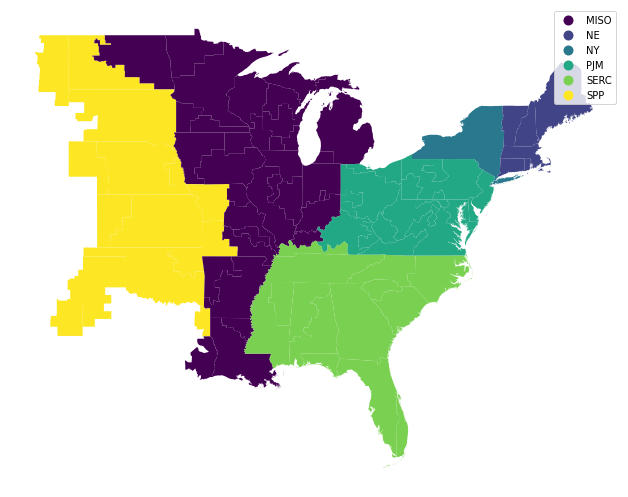

In [29]:
# EI:
serc = list(range(87,99)) + list(range(101,103))
ny = [127,128]
ne = list(range(129,135))
miso = [37] + list(range(42,47)) + list(range(68,87)) + [56,58,66] + list(range(103,109))
pjm = list(range(109,127)) + [99,100]
spp = [35,36] + list(range(38,42)) + list(range(47,56)) + [57]

serc.sort()
ny.sort()
ne.sort()
miso.sort()
pjm.sort()
spp.sort()

for i in list(range(len(serc))):
    serc[i] = 'p' + str(serc[i])

for i in list(range(len(ny))):
    ny[i] = 'p' + str(ny[i])

for i in list(range(len(ne))):
    ne[i] = 'p' + str(ne[i])

for i in list(range(len(miso))):
    miso[i] = 'p' + str(miso[i])

for i in list(range(len(pjm))):
    pjm[i] = 'p' + str(pjm[i])

for i in list(range(len(spp))):
    spp[i] = 'p' + str(spp[i])

Basemap_EI["Region"] = np.where(Basemap_EI["PCA_Code"].isin(serc), "SERC", "Other")

for i in list(range(len(Basemap_EI))):
    if Basemap_EI["Region"][i] == "Other":
        if Basemap_EI["PCA_Code"][i] in ny:
            Basemap_EI["Region"][i] = "NY"
        elif Basemap_EI["PCA_Code"][i] in ne:
            Basemap_EI["Region"][i] = "NE"
        elif Basemap_EI["PCA_Code"][i] in miso:
            Basemap_EI["Region"][i] = "MISO"
        elif Basemap_EI["PCA_Code"][i] in pjm:
            Basemap_EI["Region"][i] = "PJM"
        elif Basemap_EI["PCA_Code"][i] in spp:
            Basemap_EI["Region"][i] = "SPP"

# Map
fig, ax = plt.subplots(figsize=(11,9))
Basemap_EI.plot(column='Region',ax=ax, cmap='viridis', legend=True)
# plt.legend(loc='lower right')
plt.axis('off')
Basemap_EI
# Map
#fig, ax = plt.subplots(1, 1)
#Basemap_EI.plot(column='Region',ax=ax, cmap='Blues', legend=False,
#             legend_kwds={'label': "Aggregated Regions in Eastern Interconnection",
#                          'orientation': "vertical"})
#ax.set_title('Aggregated Regions in Eastern Interconnection')

(-2445187.808098393,
 1802076.1183871184,
 118028.81729133613,
 3069466.5282987896)

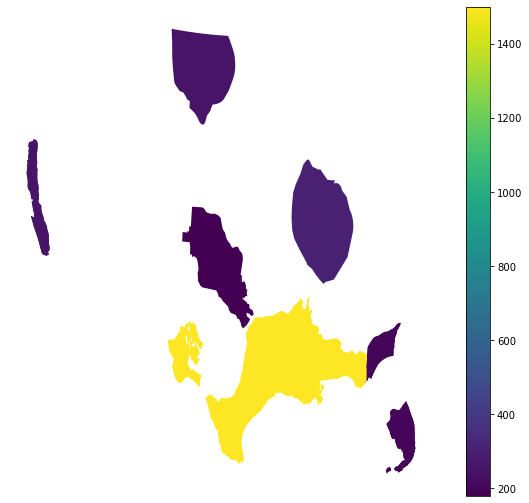

In [45]:
# Read in CO2 basins
basinMap = gpd.read_file(r"C:\Users\atpha\Documents\Postdocs\Projects\MacroCEM\Model\Python\Data\BECCS\NZAP_CO2_basins\NZAP_CO2_basins.shp")
basinMap = basinMap.set_crs('epsg:4269', allow_override=True)

res_union = Basemap_EI.overlay(basinMap, how='union')
res_union
#ax = Basemap_EI.plot(column='Region', cmap='viridis', legend=True)
#basinMap.plot(ax=ax, column='Wells', facecolor='none', edgecolor='black')


fig, ax = plt.subplots(figsize=(11,9))
#Basemap_EI.plot(column='Region',ax=ax, cmap='viridis', legend=True)
res_union.plot(column='Wells',ax=ax, cmap='viridis', legend=True)
#basinMap.plot(column='Wells',ax=ax, facecolor='none', edgecolor='black')
# plt.legend(loc='lower right')
plt.axis('off')



,index,OBJECTID,PCA_REG,Shape_Leng,Shape_Area,PCA_Code,RTO_Code,IC,geometry,Region
0,0,1,1,38.206478,5.205975,p1,rto1,WI,"MULTIPOLYGON (((-123.00126 47.13446, -123.0010...",NWPP NW
1,1,2,2,34.956800,7.651230,p2,rto1,WI,"MULTIPOLYGON (((-123.97219 46.48561, -123.9716...",NWPP NW
2,2,3,3,15.471963,6.551405,p3,rto1,WI,"POLYGON ((-117.31440 49.00000, -117.29996 48.9...",NWPP NW
3,3,4,4,5.741688,1.432429,p4,rto1,WI,"POLYGON ((-119.97301 46.73717, -119.97210 46.7...",NWPP NW
4,4,5,5,25.455348,13.701801,p5,rto1,WI,"MULTIPOLYGON (((-123.63787 46.17959, -123.6410...",NWPP NW
5,5,6,6,12.977242,5.384886,p6,rto1,WI,"POLYGON ((-123.70347 43.94513, -123.70370 43.9...",NWPP NW
6,6,7,7,17.418334,9.065501,p7,rto1,WI,"POLYGON ((-117.12600 45.08034, -117.09153 45.0...",NWPP NW
7,7,8,8,13.473947,4.253030,p8,rto2,WI,"POLYGON ((-121.33179 41.18389, -121.38959 41.1...",CAMX
8,8,9,9,45.293218,19.662976,p9,rto4,WI,"MULTIPOLYGON (((-119.02889 33.48762, -119.0287...",CAMX
9,9,10,10,29.172290,16.651295,p10,rto4,WI,"MULTIPOLYGON (((-118.59403 33.03595, -118.5931...",CAMX


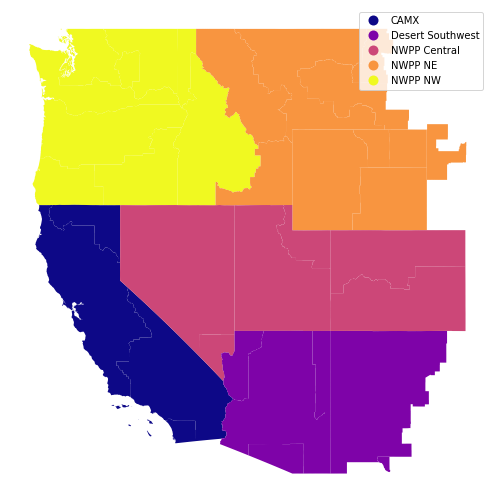

In [41]:

# WECC:
NWPP_NW = list(range(1,8)) + [14,15]
NWPP_NE = list(range(16,25))+[32] #32 in WECC
CAMX = list(range(8,12))
Desert_Southwest = list(range(27,32))+[59] #47 in EI
NWPP_Central = [12,13,25,26,33,34]

NWPP_NW.sort()
NWPP_NE.sort()
CAMX.sort()
Desert_Southwest.sort()
NWPP_Central.sort()

for i in list(range(len(NWPP_NW))):
    NWPP_NW[i] = 'p' + str(NWPP_NW[i])

for i in list(range(len(NWPP_NE))):
    NWPP_NE[i] = 'p' + str(NWPP_NE[i])

for i in list(range(len(CAMX))):
    CAMX[i] = 'p' + str(CAMX[i])

for i in list(range(len(Desert_Southwest))):
    Desert_Southwest[i] = 'p' + str(Desert_Southwest[i])

for i in list(range(len(NWPP_Central))):
    NWPP_Central[i] = 'p' + str(NWPP_Central[i])

Basemap_WECC["Region"] = np.where(Basemap_WECC["PCA_Code"].isin(NWPP_NW), "NWPP NW", "Other")

for i in list(range(len(Basemap_WECC))):
    if Basemap_WECC["Region"][i] == "Other":
        if Basemap_WECC["PCA_Code"][i] in NWPP_NE:
            Basemap_WECC["Region"][i] = "NWPP NE"
        elif Basemap_WECC["PCA_Code"][i] in CAMX:
            Basemap_WECC["Region"][i] = "CAMX"
        elif Basemap_WECC["PCA_Code"][i] in Desert_Southwest:
            Basemap_WECC["Region"][i] = "Desert Southwest"
        elif Basemap_WECC["PCA_Code"][i] in NWPP_Central:
            Basemap_WECC["Region"][i] = "NWPP Central"

fig, ax = plt.subplots(figsize=(11,9))
Basemap_WECC.plot(column='Region',ax=ax, cmap='plasma', legend=True)
#plt.legend(loc='lower right')
plt.axis('off')
Basemap_WECC


,index,OBJECTID,PCA_REG,Shape_Leng,Shape_Area,PCA_Code,RTO_Code,IC,geometry
0,59,60,60,14.053009,5.346041,p60,rto10,TX,"POLYGON ((-101.68874 32.52522, -101.69646 32.5..."
1,60,61,61,26.168273,12.221836,p61,rto10,TX,"MULTIPOLYGON (((-104.68788 30.08567, -104.6884..."
2,61,62,62,9.191365,2.633785,p62,rto10,TX,"POLYGON ((-101.77619 31.07979, -101.82818 31.0..."
3,62,63,63,27.012357,13.555801,p63,rto10,TX,"POLYGON ((-98.93468 34.19752, -98.93432 34.197..."
4,63,64,64,17.603759,6.787940,p64,rto10,TX,"POLYGON ((-97.82857 30.91076, -97.82312 30.909..."
5,64,65,65,51.695296,9.562897,p65,rto10,TX,"MULTIPOLYGON (((-97.76957 26.03607, -97.76954 ..."
6,66,67,67,11.573983,1.086122,p67,rto10,TX,"MULTIPOLYGON (((-94.37078 29.55437, -94.37519 ..."


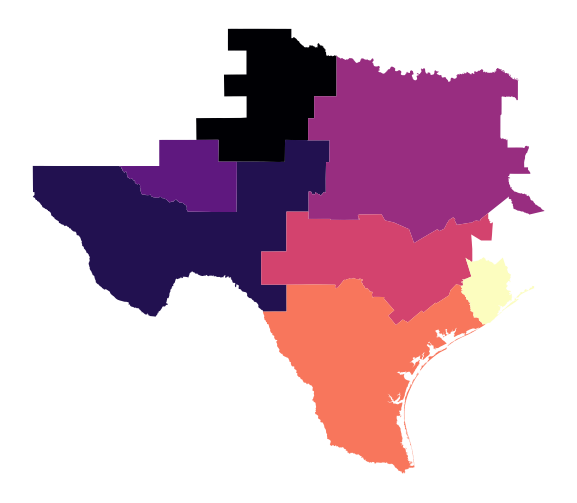

In [34]:
# ERCOT
fig, ax = plt.subplots(figsize=(11,9))
Basemap_ERCOT.plot(column='PCA_REG',ax=ax, cmap='magma', legend=False)
#plt.legend(loc='lower right')
plt.axis('off')
Basemap_ERCOT